In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [27]:
#Importing the data file under df
df = pd.read_csv('FEV-data.csv')
df.head()



,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [29]:
#filtering the data based on the condition
filtered_data = df[(df['Minimal price (gross) [PLN]'] <=350000) & (df['Range (WLTP) [km]'] >= 400)]

#Grouping the filtered data by the Make of the car
group_car = filtered_data.groupby('Make')

#Calculating the average of the above grouped car by the battery capacity
average_battery_capacity = group_car['Battery capacity [kWh]'].mean()

print(f"Filtered EV's based on two conditions are: {filtered_data}")
print(f"The average battery capacity of the EV's in accordance to their Manfuacturer are: {average_battery_capacity}")


Filtered EV's based on two conditions are:                         Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

                          Model  Minimal price (gross) [PLN]  \
0             e-tron 55 quattro                       345700   
8                           iX3                       282900   
15          Kona electric 64kWh     

In [31]:
# Drop rows with NaN values in the Energy consumption column and making copy of the data under df1
df1 = df.dropna(subset=['mean - Energy consumption [kWh/100 km]']).copy()

#Calculate Z-scores for the cleaned data
df1['Z-score'] = stats.zscore(df1['mean - Energy consumption [kWh/100 km]'])

#Taking the threshold for outliers (commonly |Z| > 2)
threshold = 2
outliers = df1[(df1['Z-score']) > threshold]

if len(outliers) > 0:
    print("Outliers detected using Z-score with threshold |Z| > 2:")
    print(outliers[['mean - Energy consumption [kWh/100 km]', 'Z-score']])
else:
    print("No outliers detected using Z-score with threshold |Z| > 2.")

Outliers detected using Z-score with threshold |Z| > 2:
    mean - Energy consumption [kWh/100 km]   Z-score
51                                    28.2  2.107645


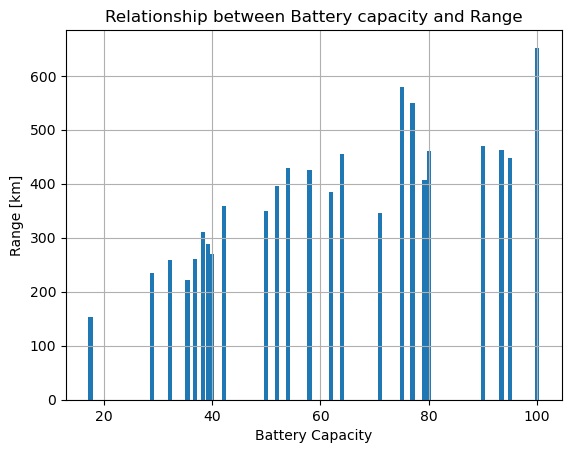

The insights are: 
1. The positive correlation of 0.8104385771936846 shows that Range increases as the battery capacity increases 
2. Each data point in battery capacity has variance in Range which could be due to other factors of the car and its features
3. The data point of 40, 60 and 80 kWh are the most common among the manufacturers of the car
4. A few outliers are also shown on the graph such as one on the extreme right that has higher than usual range for 100kWh battery


In [35]:
#Scatter plot for Battery capacity and Range
plt.bar(df["Battery capacity [kWh]"], df["Range (WLTP) [km]"])
plt.title("Relationship between Battery capacity and Range")
plt.xlabel("Battery Capacity")
plt.ylabel("Range [km]")
plt.grid(True)
plt.show()
#Calculating the correlation for the insights
correlation = df['Battery capacity [kWh]'].corr(df['Range (WLTP) [km]'])
#Insights drawn from the graph
print(f"The insights are: \n1. The positive correlation of {correlation} shows that Range increases as the battery capacity increases \n2. Each data point in battery capacity has variance in Range which could be due to other factors of the car and its features\n3. The data point of 40, 60 and 80 kWh are the most common among the manufacturers of the car\n4. A few outliers are also shown on the graph such as one on the extreme right that has higher than usual range for 100kWh battery")

In [39]:
#Taking user input for recommendation
budget = int(input("Enter your budget (PLN): "))
min_range = int(input("Enter the minimum range (km): "))
min_battery_capacity = int(input("Enter the minimum battery capacity (kWh): "))

# Filter the Data based on user inputs under three categories of budget, range and battery capacity
filter_df = df[
    (df['Minimal price (gross) [PLN]'] <= budget) &
    (df['Range (WLTP) [km]'] >= min_range) &
    (df['Battery capacity [kWh]'] >= min_battery_capacity)
]

# sorting the data in descending order and selecting the top 3 recommendations
top3_recommendation = filter_df.sort_values(by='Minimal price (gross) [PLN]', ascending=False).head(3)

#printing the top 3 recommendations for user
print("\nTop 3 EV Recommendations:")
print(top3_recommendation)

Enter your budget (PLN):  350000
Enter the minimum range (km):  400
Enter the minimum battery capacity (kWh):  80



Top 3 EV Recommendations:
             Car full name           Make              Model  \
0   Audi e-tron 55 quattro           Audi  e-tron 55 quattro   
22       Mercedes-Benz EQC  Mercedes-Benz                EQC   
8                  BMW iX3            BMW                iX3   

    Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                        345700                360                  664   
22                       334700                408                  760   
8                        282900                286                  400   

         Type of brakes  Drive type  Battery capacity [kWh]  \
0   disc (front + rear)         4WD                    95.0   
22  disc (front + rear)         4WD                    80.0   
8   disc (front + rear)  2WD (rear)                    80.0   

    Range (WLTP) [km]  ...  Permissable gross weight [kg]  \
0                 438  ...                         3130.0   
22                414  ...              

In [41]:
#selecting the engine power data from tesla and audi
tesla = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi = df[df['Make'] == 'Audi']['Engine power [KM]']

#H0(Null hypothesis) there is no significant difference in engine power between that of Tesla and Audi
#H1(Alternate hypothesis) there is a significant difference in engine power between that of Tesla and Audi

#performing the two sample t-test on the filtered data
t_stat, p_value = stats.ttest_ind(tesla, audi)

print(f"Two-sample T-test results are: \nP-Value: {p_value} \nT-stats: {t_stat}")
#taking the alpha (significance level) i.e 1-confidence level as 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejecting the null hypothesis as there is significant difference in engine power between Tesla and Audi")
else:
    print("\nNull hypothesis stands true as there is no significant difference in engine power between Tesla and Audi")

print("\nAnalysis and Recommendations: \n1. The average engine power of Tesla and Audi vehicles is the same\n2. Customers are unlikely to derive a meaningful difference in performance on the basis of engine power\n3. Other factors such as Price, Range, Charging speed, Design and feature will be distinguishing factors\n\n Taking these findings and factors in product would help consumer make better choices.")

Two-sample T-test results are: 
P-Value: 0.11672692675082785 
T-stats: 1.7024444538261416

Null hypothesis stands true as there is no significant difference in engine power between Tesla and Audi

Analysis and Recommendations: 
1. The average engine power of Tesla and Audi vehicles is the same
2. Customers are unlikely to derive a meaningful difference in performance on the basis of engine power
3. Other factors such as Price, Range, Charging speed, Design and feature will be distinguishing factors

 Taking these findings and factors in product would help consumer make better choices.


In [ ]:
# video link:--  https://drive.google.com/drive/folders/1ol5asJnO5SmzNQD8Pl6Eu7MQZsuD_Zic?usp=drive_link